<a href="https://colab.research.google.com/github/Skandi-R/PRA3024/blob/main/Sectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


yf.pdr_override()

In [ ]:
sectors =["consumer_goods", "technology","financials","healthcare","industrials","basic_materials","telecommunication","utilities","real_estate"]

consumer_goods=["DHER.DE","BOSS.DE","HFG.DE","HLE.DE"]
technology=["AIXA.DE", "BC8.DE", "SOW.DE", "WAF.DE", "NEM.DE"]
financials=["TLX.DE","CBK.DE"]
healthcare=["FIE.DE","AFX.DE","EVT.DE","GXI.DE"]
industrials=["MTX.DE","NDA.DE","BFSA.DE","STM.DE","SIX2.DE","LHA.DE","RHM.DE","DUE.DE","FRA.DE","NOEJ.DE","KGX.DE","JUN3.DE","G1A.DE"]
basic_materials=["WCH.DE","BNR.DE","LXS.DE","EVK.DE","SDF.DE","FPE3.DE"]
telecommunication=["1U1.DE","UTDI.DE","O2D.DE","SAX.DE","RRTL.DE","PSM.DE","FNTN.DE"]
utilities=["UN01.DE","ECV.DE"]
real_estate=["AT1.DE","TEG.DE","DEQ.DE","G24.DE","DWNI.DE","LEG.DE"]


In [ ]:
start_date='2014-12-12'
end_date='2019-12-12'


In [ ]:
#Method to Create an array with the returns of all the stocks in a specific sector
#gets the log return of the stocks by taking the log of one row divided by the previous. The [1:] method only takes the values after the first row, as the 0th row is full of NaNs
def create_sector_returnz(sector):
  data=pdr.get_data_yahoo(sector,start_date, end_date, progress=False )['Adj Close'] #.resample('M').ffill() 
  ret=np.log(data / data.shift(1))[1:] 
  
  month_returns_array= pd.DataFrame(ret) 
  mra= month_returns_array.to_numpy()
  sector_ret=[] 
  for x in range(len(mra)):
   sector_ret.append(np.sum(mra[x,:])/len(sector))
  sec_ret=np.array(sector_ret) 
  return sec_ret


In [17]:
create_sector_returnz(real_estate)

array([        nan,         nan,         nan, ...,  0.00158757,
        0.00182827, -0.00326957])

In [ ]:
def create_sector_returns(sector):
  data=pdr.get_data_yahoo(sector,start_date, end_date, progress=False )['Adj Close'] #.resample('M').ffill() 
  ret=np.log(data / data.shift(1))[1:] 
  
  month_returns_array= pd.DataFrame(ret) 
  mra= month_returns_array.fillna(0)
  sector_ret=[] 
  for x in range(len(mra)):
    returns_data = len(mra.iloc[x,:].dropna())  #use the dropna, then calculate how many columns are left for every row. Do this so that the 0's don't pull down the average by dividing by the length of the total stocks, only dividing by those with non 0 values
    if returns_data == 0: #avoid dividing by 0
      returns_data = 1
    sector_ret.append(np.sum(mra.iloc[x,:])/returns_data)
  sec_ret=np.array(sector_ret) 
  return sec_ret

In [20]:
create_sector_returns(real_estate)

array([-0.00223633, -0.00089067, -0.0011053 , ...,  0.00158757,
        0.00182824, -0.00326957])

In [ ]:
all_sectors_ret= np.column_stack((create_sector_returns(consumer_goods),create_sector_returns(technology),create_sector_returns(financials),create_sector_returns(healthcare),create_sector_returns(industrials),create_sector_returns(basic_materials),create_sector_returns(telecommunication),create_sector_returns(utilities),create_sector_returns(real_estate)))
all_sectors_ret

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
cov=np.cov(all_sectors_ret.T)

pca_fit=pca.fit(cov)
principal_components= pca.fit_transform(cov)
pcs=["Principal Component 1","Principal Component 2","Principal Component 3","Principal Component 4","Principal Component 5","Principal Component 6","Principal Component 7","Principal Component 8","Principal Component 9"]

nr_comps=pca_fit.n_components_

pca_ret=np.dot(all_sectors_ret,principal_components)
pca_ret1=np.dot(principal_components.T,all_sectors_ret.T)
ret_df=pd.DataFrame(all_sectors_ret, columns=sectors)

pca_cov=np.cov(pca_ret.T)
nr_comps

In [ ]:
import itertools

def portfolio_weights(num_assets, increment=0.05):
    for weights in itertools.product(range(0, int(1/increment)+1), repeat=num_assets):
        if sum(weights) == int(1/increment):
            yield [w * increment for w in weights]

num_assets = 9
weights = []
for w in portfolio_weights(num_assets):
    weights.append(w)

print(weights)

In [54]:
pcaret_df=pd.DataFrame(pca_ret,columns=pcs[:nr_comps])
pcaret_df


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6
0,2.849701e-06,-2.513019e-06,-5.767247e-07,1.208531e-06,-4.341973e-07,-5.326566e-07
1,-1.622904e-06,2.270593e-06,5.086265e-07,-3.971184e-08,7.423145e-07,1.890044e-07
2,-4.907712e-07,-2.413570e-06,4.637149e-07,1.512937e-07,2.468717e-07,-1.248265e-07
3,-4.193877e-06,-1.079925e-06,1.635084e-06,-4.571463e-07,7.367651e-07,1.365066e-07
4,3.110628e-06,3.447143e-07,8.014971e-08,-3.761611e-07,1.724827e-07,-2.023033e-07
...,...,...,...,...,...,...
1261,-2.300100e-06,7.805348e-07,-7.820846e-07,1.419236e-08,-5.955483e-07,-3.627590e-07
1262,-5.923436e-07,1.179872e-07,-1.501935e-06,8.102637e-07,7.244170e-07,3.386522e-07
1263,2.289517e-06,-7.300406e-08,2.150231e-06,-4.366367e-07,-1.279547e-06,4.589458e-07
1264,-5.655961e-07,-2.906699e-07,-2.069206e-07,-4.122379e-07,-2.846085e-07,5.103169e-07


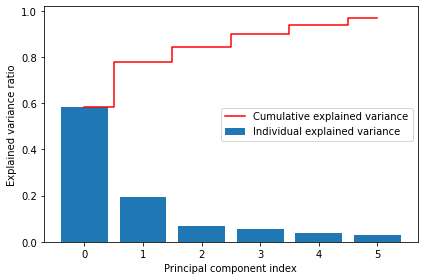

In [55]:
exp_var_pca = pca.explained_variance_ratio_


cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(len(exp_var_pca)), exp_var_pca, alpha=1, align='center', label='Individual explained variance')
plt.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance',c='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
np.random.seed(42)
num_ports = 1000

ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
  
all_weights = np.zeros((num_ports, len(sectors))) #replaced len(sectors) with nr_comps
for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(sectors))) #replaced len(sectors) with nr_comps
    weights = weights/np.sum(weights)
# Save weights
    all_weights[x,:] = weights
      # Expected return
    ret_arr[x] = np.sum( (ret_df.mean() * weights * 254)) #Normally it is multiplied by 252 for the average amount of trading days in the american markets. The german markets are open for 254 days on average
     # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(cov*254, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
all_weights

array([[0.08335534, 0.21158512, 0.16290806, ..., 0.01292673, 0.19277083,
        0.13378045],
       [0.17982445, 0.00522771, 0.24632151, ..., 0.04657801, 0.07726636,
        0.13326887],
       [0.12085938, 0.0814867 , 0.17119808, ..., 0.12760961, 0.21969434,
        0.05586926],
       ...,
       [0.01772686, 0.095618  , 0.12337728, ..., 0.0740764 , 0.16801429,
        0.14438204],
       [0.13075045, 0.11351705, 0.00233621, ..., 0.16778202, 0.12054572,
        0.05172664],
       [0.05074392, 0.08478638, 0.11870819, ..., 0.24353825, 0.0268829 ,
        0.23213774]])

In [50]:
sharpe_max= sharpe_arr.argmax()
max_ret_sr= ret_arr[sharpe_max]
max_vol_sr= vol_arr[sharpe_max]

minvol=vol_arr.argmin()
minvol_ret_nr= ret_arr[minvol]
minvol_vol_nr=vol_arr[minvol]

maxret=ret_arr.argmax()
maxret_ret=ret_arr[maxret]
maxret_vol=vol_arr[maxret]

minvol_weights= all_weights[minvol]
maxsharpe_weights= all_weights[sharpe_max]
maxret_weights= all_weights[maxret]

type(minvol_weights)

numpy.ndarray

In [51]:
minvol_df=pd.DataFrame([minvol_weights], columns=sectors)
maxret_df=pd.DataFrame([maxret_weights],columns=sectors)
maxsharpe_df=pd.DataFrame([maxsharpe_weights],columns=sectors)

In [39]:
minvol_df

,consumer_goods,technology,financials,healthcare,industrials,basic_materials,telecommunication,utilities,real_estate
0,0.090043,0.028886,0.042333,0.102,0.039313,0.05079,0.036347,0.206763,0.403524


In [40]:
maxsharpe_df

,consumer_goods,technology,financials,healthcare,industrials,basic_materials,telecommunication,utilities,real_estate
0,0.082133,0.085816,0.00797,0.27856,0.003229,0.021879,0.046573,0.35632,0.11752


In [41]:
maxret_df

,consumer_goods,technology,financials,healthcare,industrials,basic_materials,telecommunication,utilities,real_estate
0,0.040407,0.32087,0.014678,0.380326,0.044897,0.054544,0.009982,0.043384,0.090911


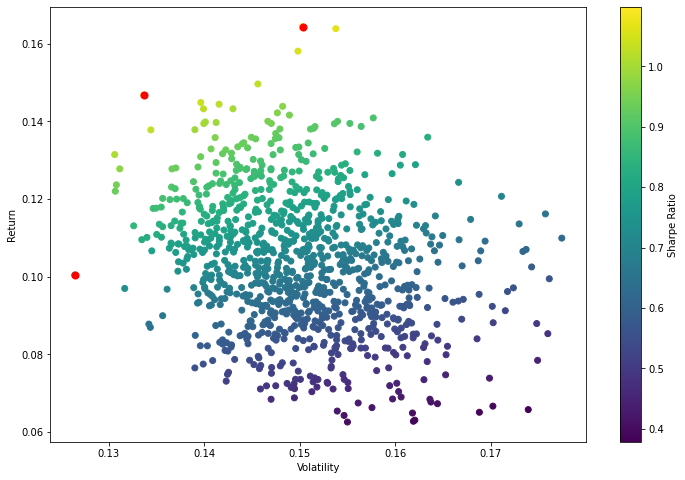

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_vol_sr, max_ret_sr,c='red', s=50) # red dot
plt.scatter(minvol_vol_nr,minvol_ret_nr,c='red',s=50)
plt.scatter(maxret_vol,maxret_ret,c='red',s=50)
plt.show()

In [43]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(ret_df.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(ret_df.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [44]:
cons= ({'type':'eq','fun':check_sum})
boundaries=[]
for x in range(len(ret_df.columns)):
  boundaries.append((0,1))
bounds=tuple(boundaries)
init_guess=[]
for y in range(len(ret_df.columns)):
  init_guess.append(1/len(ret_df.columns))
print(bounds)
print(init_guess)

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]


In [45]:
from scipy.optimize import minimize
opt_results=minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
print(opt_results)

     fun: -1.4289243382945134
     jac: array([ 4.87402275e-01,  1.01637691e-02,  1.05966423e+00, -1.21772289e-04,
        4.86008838e-01,  1.15943423e+00,  1.16103593e+00,  9.46521759e-05,
       -2.81780958e-05])
 message: 'Optimization terminated successfully'
    nfev: 60
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([9.79323682e-16, 0.00000000e+00, 0.00000000e+00, 3.25666938e-01,
       5.21909271e-17, 5.10049825e-16, 4.49708432e-16, 4.77592120e-01,
       1.96740942e-01])


In [46]:
get_ret_vol_sr(opt_results.x)
frontier_y=np.linspace(0,0.3,200)
def minimize_volatility(weights):
  return get_ret_vol_sr(weights)[1]

In [47]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

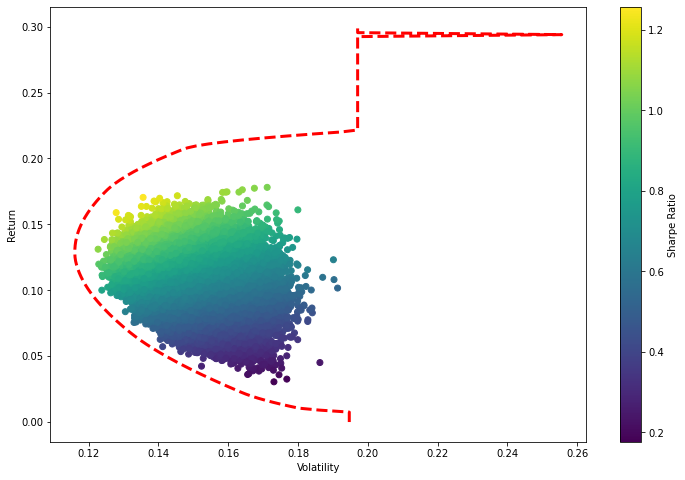

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()